In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import joblib
import datetime 

In [2]:
game=pd.read_csv(r"E:\Linear regression projects\video game sales.csv")

In [3]:
game

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NaN,Super Mario Bros.,NES,Platform,NaN,NaN,NaN,NaN,0.77,40.24
2,NaN,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,NaN,Wii Sports Resort,NaN,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,NaN,Pokemon Red/Pokemon Blue,NaN,Role-Playing,Nintendo,NaN,NaN,NaN,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,16596.0,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597.0,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598.0,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599.0,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
game.shape

(16598, 10)

In [5]:
game.size


165980

In [6]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          15593 non-null  float64
 1   Name          16366 non-null  object 
 2   Platform      16179 non-null  object 
 3   Genre         16337 non-null  object 
 4   Publisher     15509 non-null  object 
 5   NA_Sales      15196 non-null  float64
 6   EU_Sales      14039 non-null  float64
 7   JP_Sales      13597 non-null  float64
 8   Other_Sales   13846 non-null  float64
 9   Global_Sales  14866 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [7]:
game.tail()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596.0,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597.0,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598.0,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599.0,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600.0,Spirits & Spells,GBA,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [8]:
game.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NaN,Super Mario Bros.,NES,Platform,NaN,NaN,NaN,NaN,0.77,40.24
2,NaN,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,NaN,Wii Sports Resort,NaN,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,NaN,Pokemon Red/Pokemon Blue,NaN,Role-Playing,Nintendo,NaN,NaN,NaN,1.00,31.37


In [9]:
game.isnull()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,True,True,True,True,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,False,False,False,False
4,True,False,True,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False


In [10]:
game.notnull()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,False,False,False,False,True,True
2,False,True,True,True,True,True,True,True,True,True
3,False,True,False,True,True,True,True,True,True,True
4,False,True,False,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
16593,True,True,True,True,True,True,True,True,True,True
16594,True,True,True,True,True,True,True,True,True,True
16595,True,True,True,True,True,True,True,True,True,True
16596,True,True,True,True,True,True,True,True,True,True


In [11]:
game.isna()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,True,True,True,True,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,False,False,False,False
4,True,False,True,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False


In [12]:
game.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,15593.000000,15196.000000,14039.000000,13597.000000,13846.000000,14866.000000
mean,8060.424101,0.226803,0.112119,0.059312,0.035376,0.446997
std,4743.254711,0.666912,0.452258,0.232105,0.154902,1.459950
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4023.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,7921.000000,0.070000,0.020000,0.000000,0.010000,0.150000
75%,11862.000000,0.210000,0.080000,0.030000,0.020000,0.390000
max,16600.000000,41.490000,29.020000,6.040000,8.460000,82.740000


In [13]:
game.dropna()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
11,12.0,Mario Kart DS,DS,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
34,35.0,Call of Duty: Black Ops II,PS3,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36.0,Call of Duty: Black Ops II,X360,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
41,42.0,Animal Crossing: Wild World,DS,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
...,...,...,...,...,...,...,...,...,...,...
16593,16596.0,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597.0,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598.0,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599.0,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [14]:
game.isna().sum()

Rank            1005
Name             232
Platform         419
Genre            261
Publisher       1089
NA_Sales        1402
EU_Sales        2559
JP_Sales        3001
Other_Sales     2752
Global_Sales    1732
dtype: int64

In [15]:
game.isnull().sum()

Rank            1005
Name             232
Platform         419
Genre            261
Publisher       1089
NA_Sales        1402
EU_Sales        2559
JP_Sales        3001
Other_Sales     2752
Global_Sales    1732
dtype: int64

In [16]:
(game.isnull().sum()/(len(game)))*100

Rank             6.054946
Name             1.397759
Platform         2.524401
Genre            1.572479
Publisher        6.561031
NA_Sales         8.446801
EU_Sales        15.417520
JP_Sales        18.080492
Other_Sales     16.580311
Global_Sales    10.434992
dtype: float64

In [17]:
game.dropna(subset=["JP_Sales"],inplace=True)
game.dropna(subset=["EU_Sales"],inplace=True)
game.dropna(subset=["Name"],inplace=True)
game.dropna(subset=["Genre"],inplace=True)
game.dropna(subset=["Platform"],inplace=True)
game['Publisher'].fillna(method='bfill' , inplace=True)
game["NA_Sales"].ffill(axis=0,inplace=True)
game['Global_Sales'].fillna(game['Global_Sales'].mean(), inplace=True)

<Axes: >

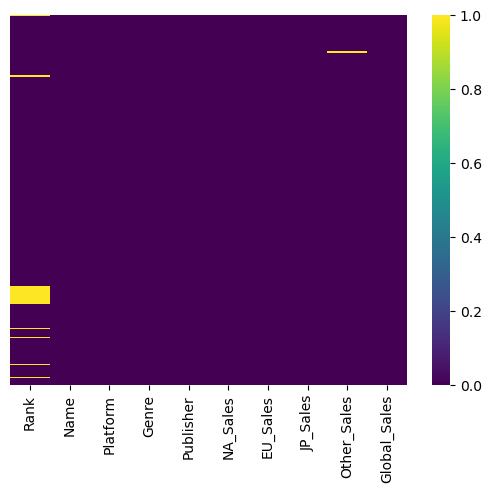

In [18]:
sns.heatmap(game.isnull(),yticklabels=False,cmap="viridis") #heatmap

In [19]:
game.drop(['Genre'],axis=1,inplace=True)#droping the column name (Genre)

In [20]:
game #the 9 columns will be displayed 

,Rank,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,Nintendo,41.49,29.02,3.77,8.46,82.74
2,NaN,Mario Kart Wii,Wii,Nintendo,15.85,12.88,3.79,3.31,35.82
10,NaN,Nintendogs,DS,Nintendo,9.07,11.00,1.93,2.75,24.76
11,12.0,Mario Kart DS,DS,Nintendo,9.81,7.57,4.13,1.92,23.42
20,21.0,Pokemon Diamond/Pokemon Pearl,DS,Nintendo,9.81,4.52,6.04,1.37,18.36
...,...,...,...,...,...,...,...,...,...
16593,16596.0,Woody Woodpecker in Crazy Castle 5,GBA,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597.0,Men in Black II: Alien Escape,GC,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598.0,SCORE International Baja 1000: The Official Game,PS2,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599.0,Know How 2,DS,7G//AMES,0.00,0.01,0.00,0.00,0.01


<Axes: >

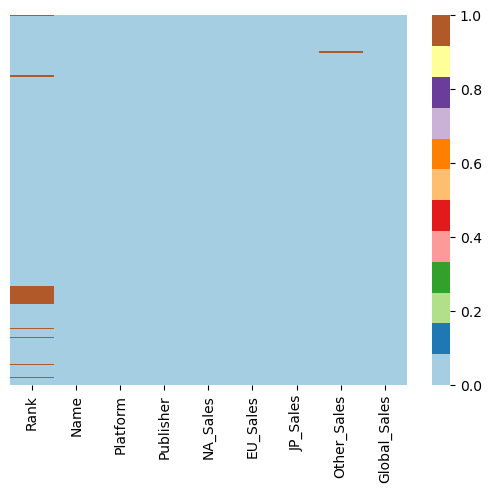

In [21]:
sns.heatmap(game.isnull(),yticklabels=False,cmap="Paired") #heatmap 

In [22]:
data_set=[['Wii Sports',82.74],['New Super Mario Bros',30.01],['Call of Duty:Modern Warefare 3',14.76],['Grand Theft Auto 4',11.02]] #passing the list 
game_test=pd.DataFrame(data_set,columns=['Name','Global_Sales'])#creating data frame by using list 

In [23]:
game_test

,Name,Global_Sales
0,Wii Sports,82.74
1,New Super Mario Bros,30.01
2,Call of Duty:Modern Warefare 3,14.76
3,Grand Theft Auto 4,11.02


In [24]:
game.columns

Index(['Rank', 'Name', 'Platform', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [25]:
game.drop(['Other_Sales'],axis=1,inplace=True) #droping the Other_sales

In [26]:
game

,Rank,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,1.0,Wii Sports,Wii,Nintendo,41.49,29.02,3.77,82.74
2,NaN,Mario Kart Wii,Wii,Nintendo,15.85,12.88,3.79,35.82
10,NaN,Nintendogs,DS,Nintendo,9.07,11.00,1.93,24.76
11,12.0,Mario Kart DS,DS,Nintendo,9.81,7.57,4.13,23.42
20,21.0,Pokemon Diamond/Pokemon Pearl,DS,Nintendo,9.81,4.52,6.04,18.36
...,...,...,...,...,...,...,...,...
16593,16596.0,Woody Woodpecker in Crazy Castle 5,GBA,Kemco,0.01,0.00,0.00,0.01
16594,16597.0,Men in Black II: Alien Escape,GC,Infogrames,0.01,0.00,0.00,0.01
16595,16598.0,SCORE International Baja 1000: The Official Game,PS2,Activision,0.00,0.00,0.00,0.01
16596,16599.0,Know How 2,DS,7G//AMES,0.00,0.01,0.00,0.01


In [27]:
game.rename(columns={'JP_Sales':'Japan_Sales'}) #I have change the columns name Jp to Japan 

,Rank,Name,Platform,Publisher,NA_Sales,EU_Sales,Japan_Sales,Global_Sales
0,1.0,Wii Sports,Wii,Nintendo,41.49,29.02,3.77,82.74
2,NaN,Mario Kart Wii,Wii,Nintendo,15.85,12.88,3.79,35.82
10,NaN,Nintendogs,DS,Nintendo,9.07,11.00,1.93,24.76
11,12.0,Mario Kart DS,DS,Nintendo,9.81,7.57,4.13,23.42
20,21.0,Pokemon Diamond/Pokemon Pearl,DS,Nintendo,9.81,4.52,6.04,18.36
...,...,...,...,...,...,...,...,...
16593,16596.0,Woody Woodpecker in Crazy Castle 5,GBA,Kemco,0.01,0.00,0.00,0.01
16594,16597.0,Men in Black II: Alien Escape,GC,Infogrames,0.01,0.00,0.00,0.01
16595,16598.0,SCORE International Baja 1000: The Official Game,PS2,Activision,0.00,0.00,0.00,0.01
16596,16599.0,Know How 2,DS,7G//AMES,0.00,0.01,0.00,0.01


In [28]:
game[['Name','Platform','Publisher']].describe()

,Name,Platform,Publisher
count,12767,12767,12767
unique,9548,31,542
top,LEGO Marvel Super Heroes,DS,Electronic Arts
freq,8,1728,936


In [29]:
video=game.sample(10)

In [30]:
video

,Rank,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
8482,8484.0,Gunslingers,Wii,Neko Entertainment,0.08,0.06,0.00,0.16
12565,12567.0,World Soccer Winning Eleven 9 (US sales),PSP,Konami Digital Entertainment,0.05,0.00,0.00,0.06
4496,4498.0,Primal,PS2,Sony Computer Entertainment,0.21,0.17,0.00,0.43
13122,NaN,My Body Coach,Wii,Big Ben Interactive,0.00,0.04,0.00,0.05
11690,11692.0,Storybook Workshop,Wii,Konami Digital Entertainment,0.07,0.00,0.00,0.08
4089,4091.0,Active Life: Extreme Challenge,Wii,Namco Bandai Games,0.15,0.27,0.00,0.48
929,931.0,LittleBigPlanet 3,PS4,Sony Computer Entertainment,0.64,0.92,0.01,1.86
16233,16236.0,Marvel: Ultimate Alliance,PC,Activision,0.01,0.00,0.00,0.01
1383,1385.0,Far Cry 2,PS3,Ubisoft,0.43,0.70,0.01,1.40
4619,4621.0,Ghost Trick: Phantom Detective,DS,Nintendo,0.20,0.08,0.12,0.42


In [31]:
cat_data=game.select_dtypes(include=object)
num_data=game.select_dtypes(exclude=object)

In [32]:
cat_data

,Name,Platform,Publisher
0,Wii Sports,Wii,Nintendo
2,Mario Kart Wii,Wii,Nintendo
10,Nintendogs,DS,Nintendo
11,Mario Kart DS,DS,Nintendo
20,Pokemon Diamond/Pokemon Pearl,DS,Nintendo
...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Kemco
16594,Men in Black II: Alien Escape,GC,Infogrames
16595,SCORE International Baja 1000: The Official Game,PS2,Activision
16596,Know How 2,DS,7G//AMES


In [33]:
num_data

,Rank,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,1.0,41.49,29.02,3.77,82.74
2,NaN,15.85,12.88,3.79,35.82
10,NaN,9.07,11.00,1.93,24.76
11,12.0,9.81,7.57,4.13,23.42
20,21.0,9.81,4.52,6.04,18.36
...,...,...,...,...,...
16593,16596.0,0.01,0.00,0.00,0.01
16594,16597.0,0.01,0.00,0.00,0.01
16595,16598.0,0.00,0.00,0.00,0.01
16596,16599.0,0.00,0.01,0.00,0.01


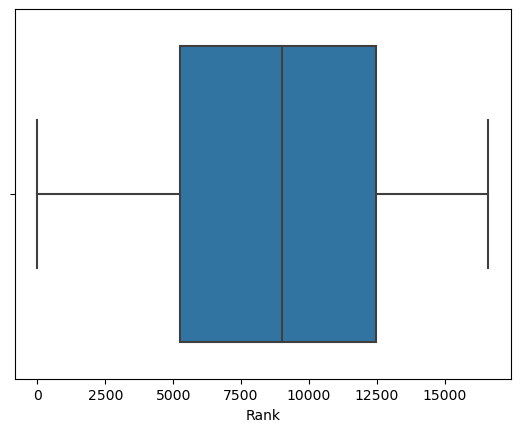

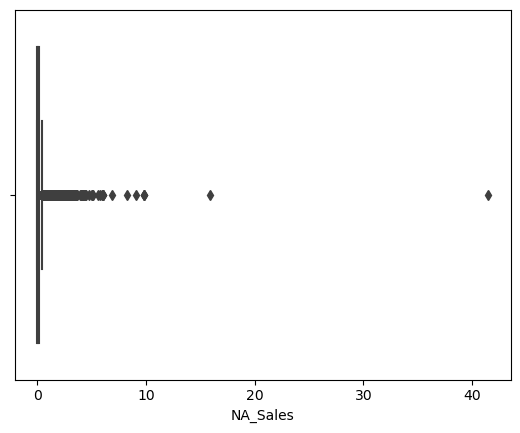

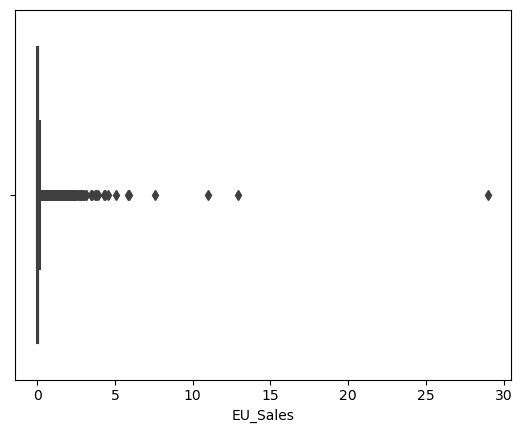

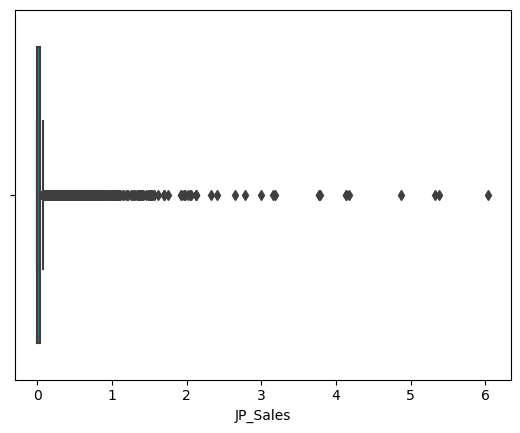

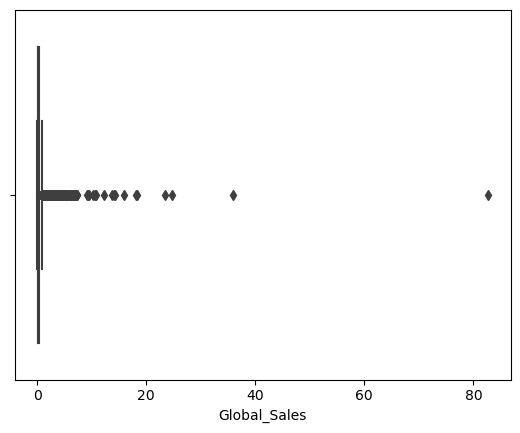

In [34]:
for i in num_data.columns:
    sns.boxplot(x=game[i])
    plt.show()

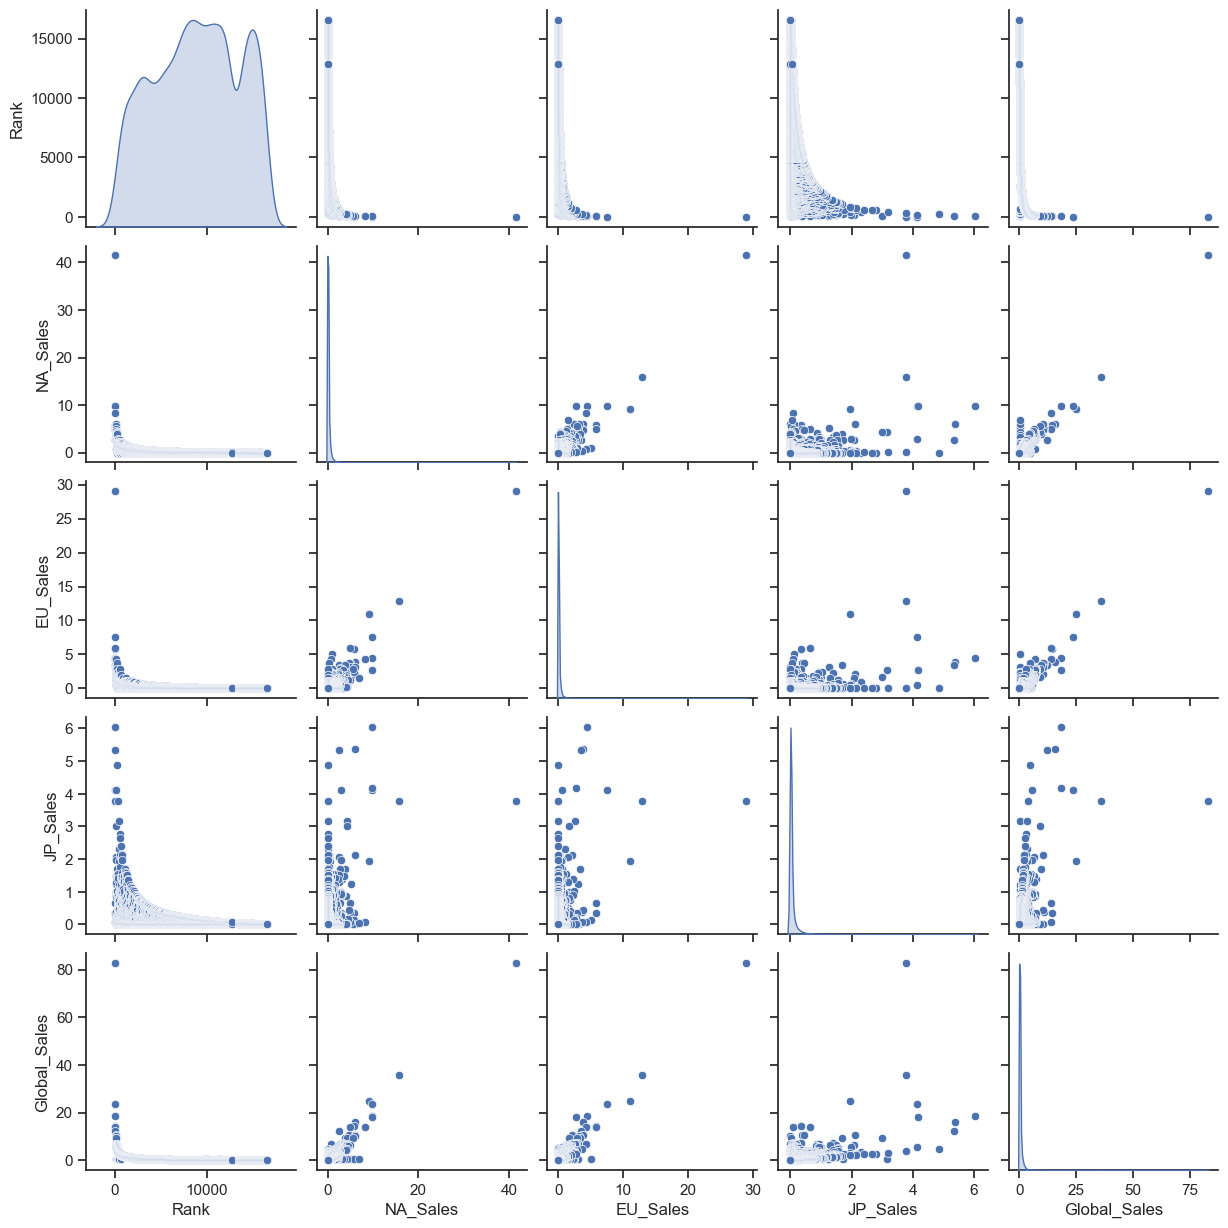

In [35]:
sns.set(style="ticks")
sns.pairplot(game,diag_kind="kde",markers="o")
plt.show()

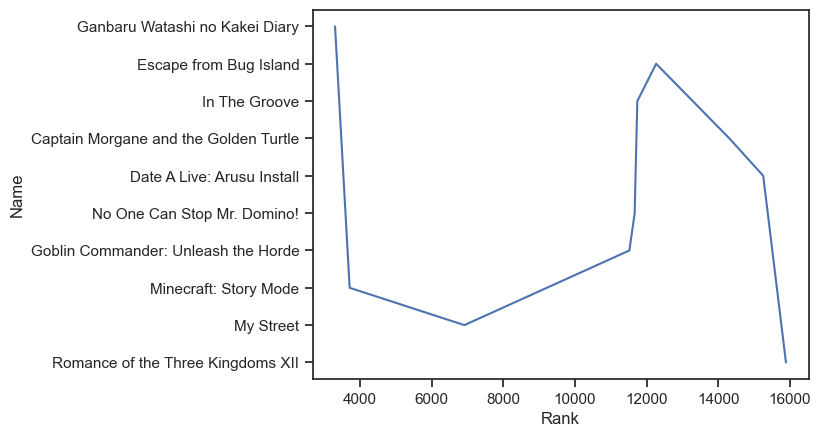

In [36]:
a=game.sample(10)
sns.lineplot(x="Rank",y="Name",data=a)
plt.show()

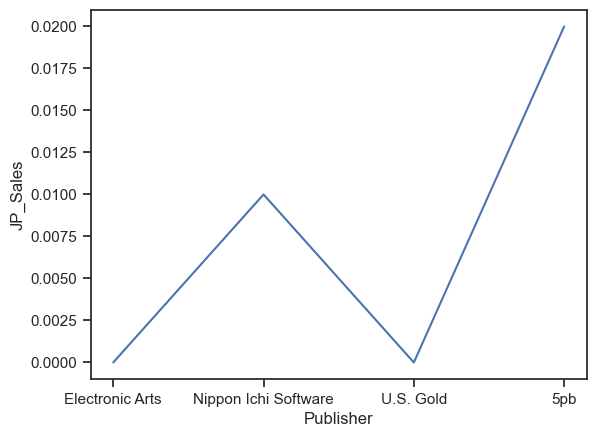

In [37]:
a=game.sample(5)
sns.lineplot(x="Publisher",y="JP_Sales",data=a)
plt.show()

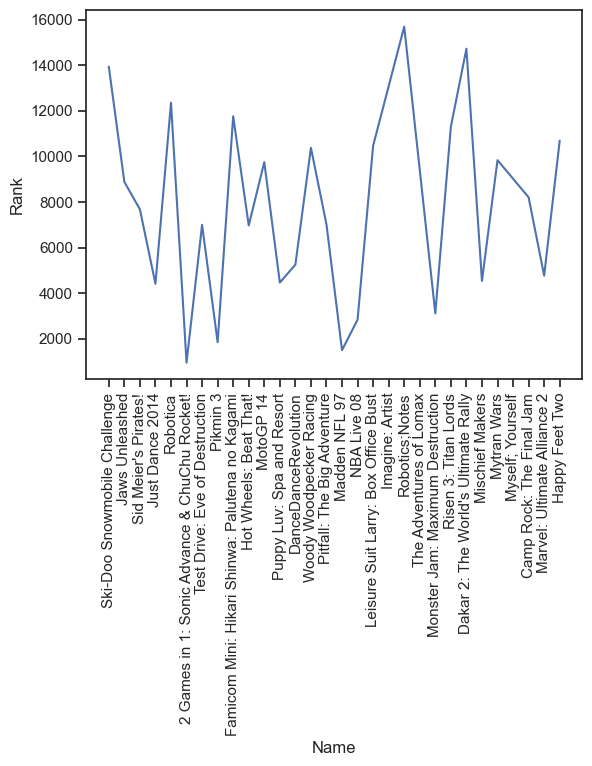

In [38]:
a=game.sample(30)
figsize=(20,15)
sns.lineplot(x="Name",y="Rank",data=a)
plt.xticks(rotation=90)
plt.show()

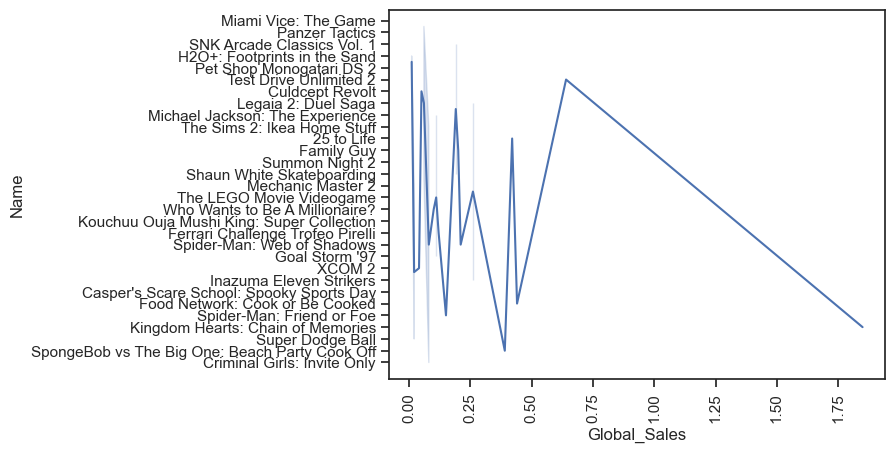

In [39]:
a=game.sample(30)
sns.lineplot(x="Global_Sales",y="Name",data=a)
plt.xticks(rotation=90)
plt.show()

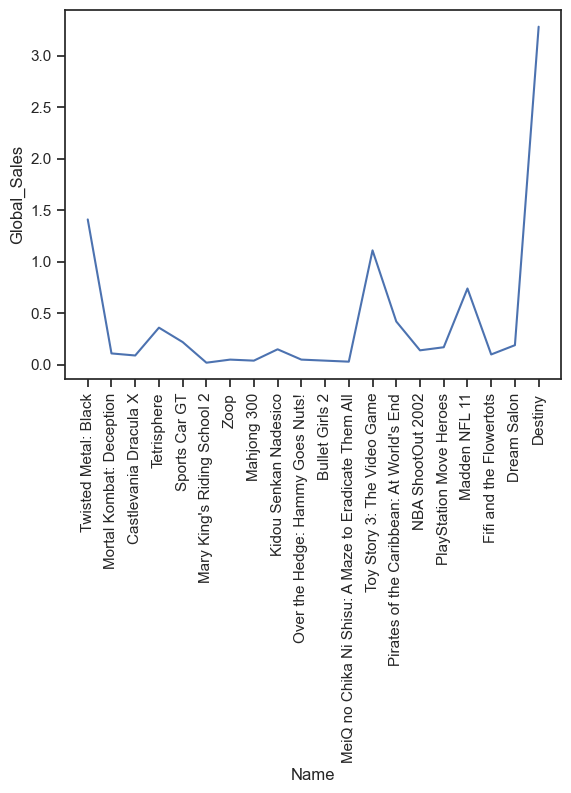

In [40]:
a=game.sample(20)
figsize=(10,12)
sns.lineplot(x="Name",y="Global_Sales",data=a)
plt.xticks(rotation=90)
plt.show()

<Axes: >

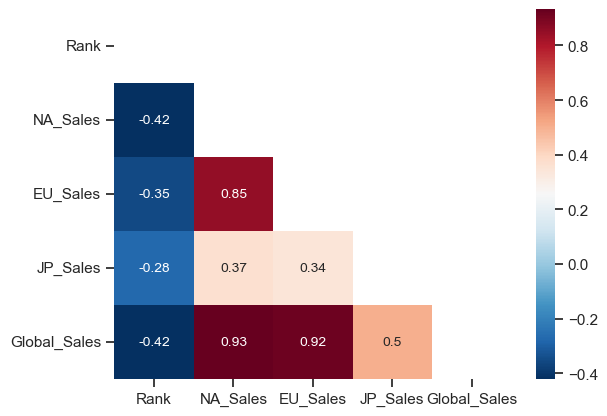

In [41]:
corr=num_data.corr()
msk=np.triu(np.ones_like(corr))
sns.heatmap(corr,cmap=plt.cm.RdBu_r,annot=True,annot_kws={'size':10},mask=msk)

<Axes: xlabel='Global_Sales', ylabel='Count'>

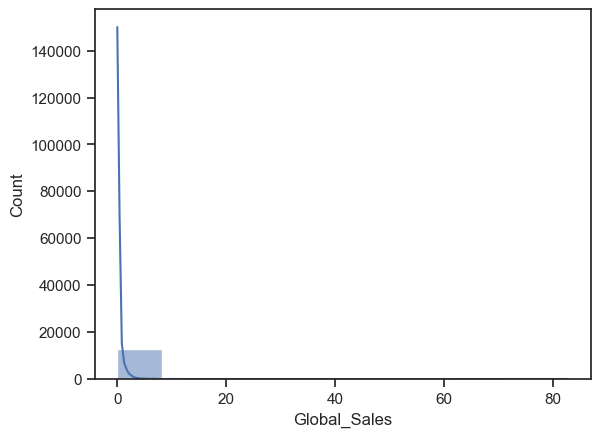

In [42]:
sns.histplot(game["Global_Sales"],bins=10,kde=True)

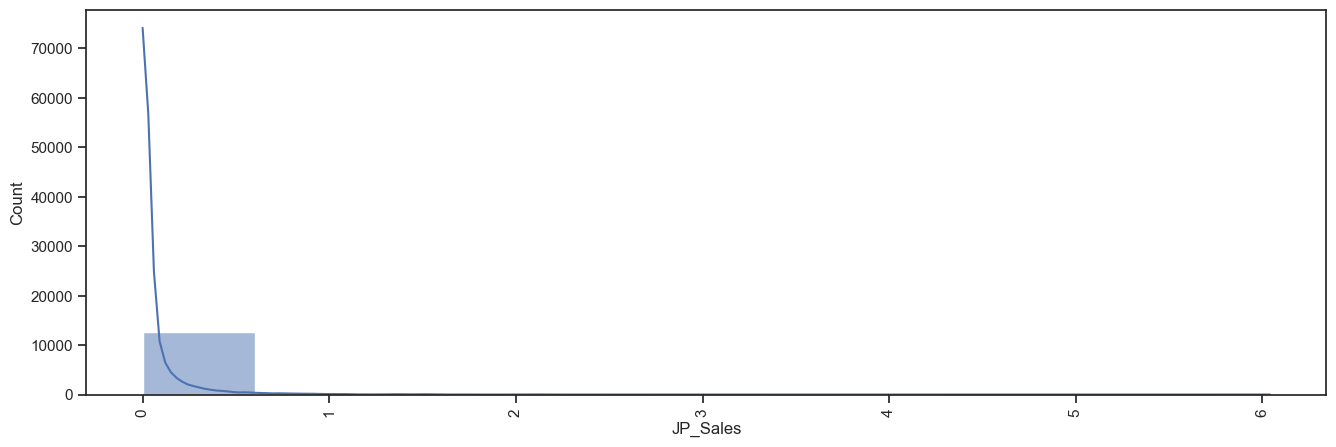

In [43]:
plt.figure(figsize=(16,5))
sns.histplot(game["JP_Sales"],bins=10,kde=True)
plt.xticks(rotation=90)
plt.show()

In [44]:
z=game.groupby("Publisher")["Publisher"].count()

In [45]:
z

Publisher
10TACLE Studios                  3
1C Company                       3
20th Century Fox Video Games     4
2D Boy                           1
3DO                             27
                                ..
id Software                      1
imageepoch Inc.                  2
inXile Entertainment             1
mixi, Inc                        1
responDESIGN                     1
Name: Publisher, Length: 542, dtype: int64

In [46]:
g=game.sample(100)

In [47]:
g

,Rank,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
13261,NaN,Ultimate Ghosts 'n Goblins (JP sales),PSP,Capcom,0.00,0.00,0.05,0.05
9518,9520.0,Margot's Word Brain,Wii,Zoo Digital Publishing,0.12,0.00,0.00,0.13
14804,14807.0,Nanotek Warrior,PS,Virgin Interactive,0.01,0.01,0.00,0.03
8824,8826.0,Super Monkey Ball Adventure,GC,Sega,0.12,0.03,0.00,0.15
4374,4376.0,Band Hero,DS,Activision,0.21,0.19,0.00,0.45
...,...,...,...,...,...,...,...,...
7986,7988.0,Call of Juarez,X360,Ubisoft,0.14,0.02,0.00,0.19
7544,7546.0,Tekken 3D: Prime Edition,3DS,Nintendo,0.06,0.08,0.05,0.20
14636,14639.0,Spectral Souls: Resurrection of the Ethereal E...,PSP,Idea Factory,0.03,0.00,0.00,0.03
1254,1256.0,Final Fantasy XIV: A Realm Reborn,PC,Square Enix,0.86,0.48,0.00,1.50


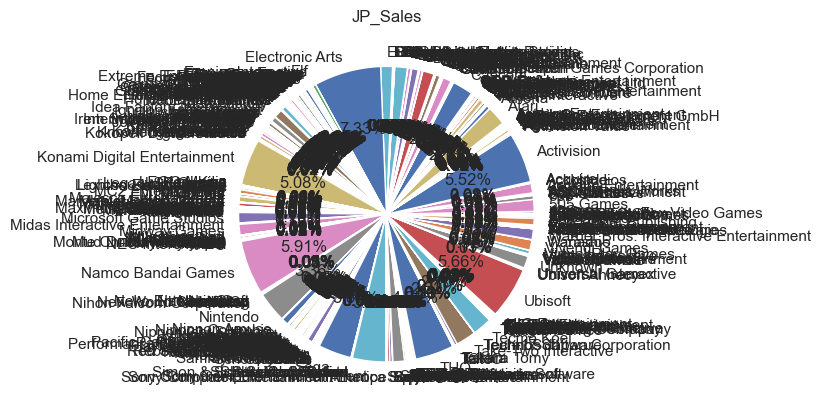

In [48]:
a=game.sample(5)
plt.pie(z,labels=z.index,autopct="%.2f%%")
plt.xticks(rotation=90)
plt.title("JP_Sales")
plt.show()

In [49]:
game["JP_Sales"].sample(10)

3721     0.13
6808     0.24
7589     0.09
14229    0.03
11813    0.00
10464    0.00
6245     0.19
3805     0.00
15586    0.02
9604     0.00
Name: JP_Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x27fc7a97490>,
 [Text(1.099457216426567, 0.03455183421390152, ''),
  Text(1.0735084379079578, 0.23995756654128794, ''),
  Text(0.6741977512874006, 0.8691705196099397, ''),
  Text(-1.2873679144189123e-08, 1.0999999999999999, ''),
  Text(-0.30689022851116443, 1.056323050796661, ''),
  Text(-0.5894094844769343, 0.9287607117059996, ''),
  Text(-0.9287607255021237, 0.5894094627377211, ''),
  Text(-1.0913261734466653, 0.13786654108324864, ''),
  Text(-1.0095300896839507, -0.43686267639009246, ''),
  Text(-0.5599455737251648, -0.946816220005549, ''),
  Text(-1.2873679657860485e-08, -1.0999999999999999, ''),
  Text(0.40493699933500155, -1.0227541378892413, ''),
  Text(0.4993895393900226, -0.9801071818672799, ''),
  Text(0.8251221670583663, -0.7274430626715094, ''),
  Text(1.0654414723751324, -0.27355889483456786, ''),
  Text(1.09782939975141, -0.06906959563700323, '')])

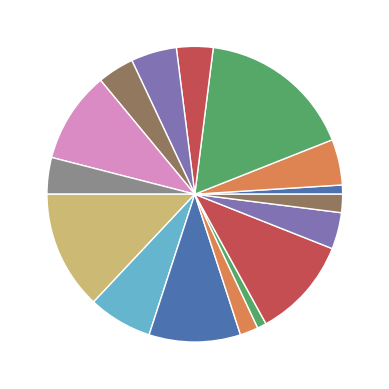

In [50]:
z=g.groupby("Platform")["Platform"].count()
plt.pie(z)

In [51]:
z=game.groupby("Name")["Name"].count()

In [52]:
z

Name
.hack//G.U. Vol.1//Rebirth                 1
.hack//G.U. Vol.2//Reminisce               1
.hack//G.U. Vol.2//Reminisce (jp sales)    1
.hack//Link                                1
.hack//Mutation Part 2                     1
                                          ..
thinkSMART: Chess for Kids                 1
uDraw Studio                               1
uDraw Studio: Instant Artist               1
wwe Smackdown vs. Raw 2006                 1
¡Shin Chan Flipa en colores!               1
Name: Name, Length: 9548, dtype: int64

Text(0.5, 1.0, 'Range the sales of game')

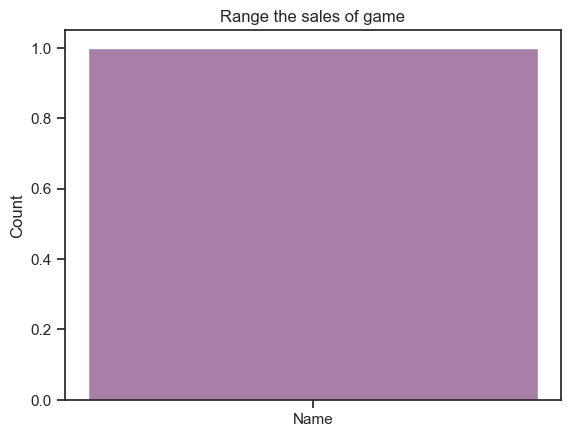

In [53]:
sns.histplot(x=['Name'],color='#500050',kde=True)
plt.title(f'Range the sales of game')

<Axes: xlabel='JP_Sales'>

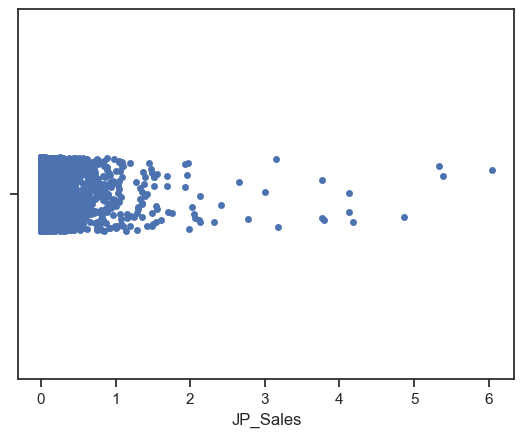

In [54]:
sns.stripplot(x="JP_Sales",data=game)

<Axes: xlabel='NA_Sales', ylabel='EU_Sales'>

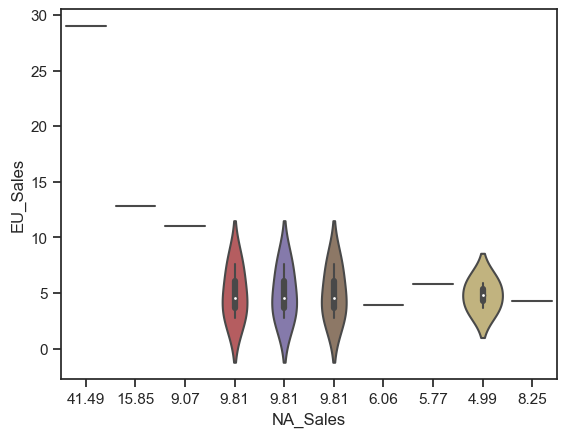

In [55]:
sns.violinplot(x="NA_Sales",y="EU_Sales",data=game,order=game.NA_Sales.iloc[:10])

<Axes: xlabel='NA_Sales', ylabel='EU_Sales'>

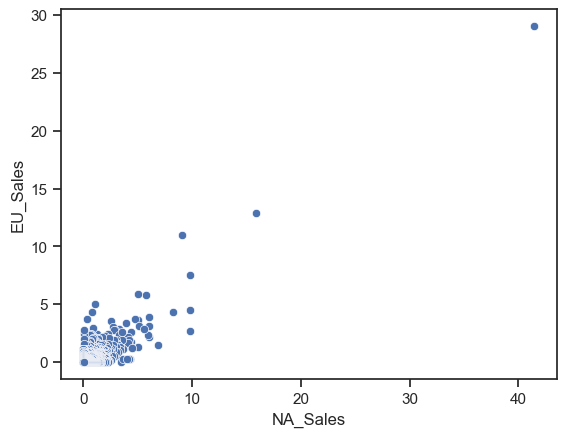

In [56]:
sns.scatterplot(x="NA_Sales",y="EU_Sales",data=game)

<Axes: xlabel='Global_Sales', ylabel='Density'>

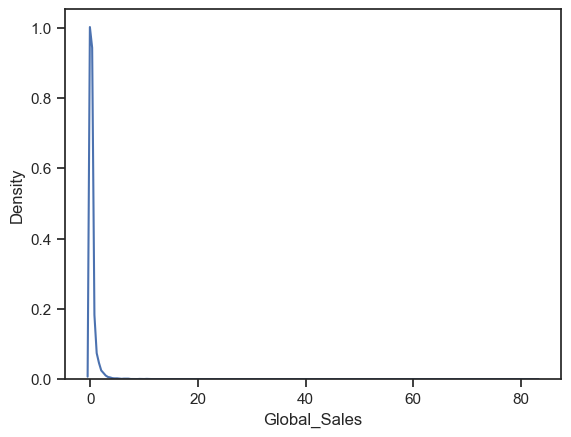

In [57]:
sns.kdeplot(game.Global_Sales)

<Axes: xlabel='JP_Sales', ylabel='Proportion'>

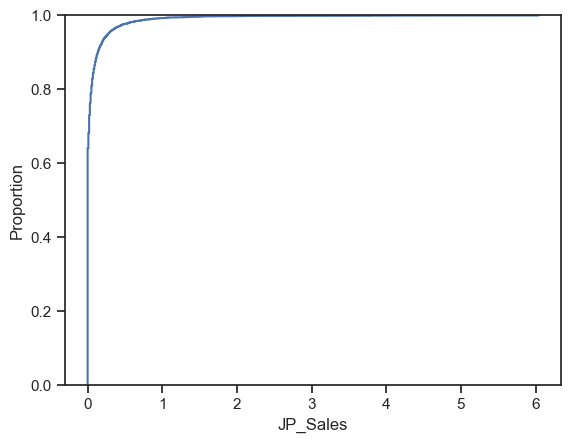

In [58]:
sns.ecdfplot(game.JP_Sales)

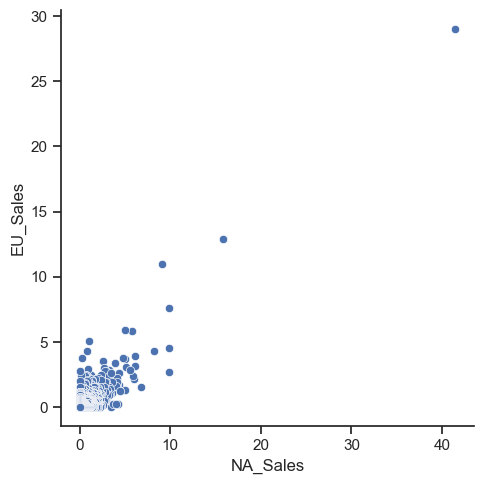

In [59]:
sns.relplot(x="NA_Sales",y="EU_Sales",data=game)

In [60]:
from scipy import stats
z_score=stats.zscore(game["Global_Sales"])
z_score_outliers=(z_score<-3)|(z_score>3)

In [61]:
z_score_outlier_rows=game[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:       Rank                                         Name Platform Publisher  \
0      1.0                                   Wii Sports      Wii  Nintendo   
2      NaN                               Mario Kart Wii      Wii  Nintendo   
10     NaN                                   Nintendogs       DS  Nintendo   
11    12.0                                Mario Kart DS       DS  Nintendo   
20    21.0                Pokemon Diamond/Pokemon Pearl       DS  Nintendo   
..     ...                                          ...      ...       ...   
324  325.0  LEGO Indiana Jones: The Original Adventures     X360   Ubisoft   
325  326.0                 Resident Evil Director's Cut       PS   Ubisoft   
326  327.0                Ratchet & Clank: Size Matters      PSP   Ubisoft   
327  328.0                              Just Dance 2014      Wii   Ubisoft   
329  330.0                            Super Paper Mario      Wii  Nintendo   

     NA_Sales  EU_Sales  JP_Sales

In [62]:
game.shape

(12767, 8)

In [63]:
x=(z_score>-3)&(z_score<3)

In [64]:
new_df=game[x]

In [65]:
new_df

,Rank,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
58,NaN,Pokemon FireRed/Pokemon LeafGreen,GBA,Nintendo,4.34,2.65,3.15,0.358065
59,60.0,Super Mario 64,DS,Nintendo,5.08,3.11,1.25,0.358065
70,NaN,Call of Duty 4: Modern Warfare,X360,Activision,5.91,2.38,0.13,0.358065
79,NaN,Halo 2,XB,Microsoft Game Studios,6.82,1.53,0.05,0.358065
82,NaN,FIFA Soccer 13,PS3,Nintendo,1.06,5.05,0.13,0.358065
...,...,...,...,...,...,...,...,...
16593,16596.0,Woody Woodpecker in Crazy Castle 5,GBA,Kemco,0.01,0.00,0.00,0.010000
16594,16597.0,Men in Black II: Alien Escape,GC,Infogrames,0.01,0.00,0.00,0.010000
16595,16598.0,SCORE International Baja 1000: The Official Game,PS2,Activision,0.00,0.00,0.00,0.010000
16596,16599.0,Know How 2,DS,7G//AMES,0.00,0.01,0.00,0.010000


In [66]:
z_score=stats.zscore(new_df["NA_Sales"])
z_score_outlier=(z_score<-3)|(z_score>3)

In [67]:
z_score_outlier_row=new_df[z_score_outlier]
print("outliers detected by Z-score:",z_score_outlier_row)

outliers detected by Z-score:         Rank                                      Name Platform  \
58       NaN         Pokemon FireRed/Pokemon LeafGreen      GBA   
59      60.0                            Super Mario 64       DS   
70       NaN            Call of Duty 4: Modern Warfare     X360   
79       NaN                                    Halo 2       XB   
177    178.0  Professor Layton and the Curious Village       DS   
...      ...                                       ...      ...   
1552  1554.0                     The Sims 2: Nightlife       PC   
1593  1595.0                    RollerCoaster Tycoon 2       PC   
1599  1601.0      Transformers: Autobots / Decepticons       DS   
1642  1644.0                               NBA Live 99       PS   
1766  1768.0                                   Kaboom!     2600   

                   Publisher  NA_Sales  EU_Sales  JP_Sales  Global_Sales  
58                  Nintendo      4.34      2.65      3.15      0.358065  
59             

In [68]:
p=(z_score>-3)&(z_score<3)
df_new=new_df[p]

In [69]:
df_new

,Rank,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
82,NaN,FIFA Soccer 13,PS3,Nintendo,1.06,5.05,0.13,0.358065
331,332.0,The Witcher 3: Wild Hunt,PS4,Namco Bandai Games,0.96,2.00,0.21,3.730000
344,345.0,Gran Turismo 6,PS3,Activision,0.71,1.80,0.40,3.640000
347,348.0,FIFA Soccer 10,PS3,Activision,0.60,2.46,0.05,3.630000
348,349.0,Pro Evolution Soccer 2008,PS2,Activision,0.05,0.00,0.64,3.630000
...,...,...,...,...,...,...,...,...
16593,16596.0,Woody Woodpecker in Crazy Castle 5,GBA,Kemco,0.01,0.00,0.00,0.010000
16594,16597.0,Men in Black II: Alien Escape,GC,Infogrames,0.01,0.00,0.00,0.010000
16595,16598.0,SCORE International Baja 1000: The Official Game,PS2,Activision,0.00,0.00,0.00,0.010000
16596,16599.0,Know How 2,DS,7G//AMES,0.00,0.01,0.00,0.010000


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import joblib

In [71]:
categorical_cols=['Name','Platform']
encoder=OneHotEncoder(drop='first',sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(df_new[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols))
numerical_cols=['NA_Sales','JP_Sales']
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(df_new[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [72]:
encoder_cols

,Name_.hack//G.U. Vol.2//Reminisce,Name_.hack//G.U. Vol.2//Reminisce (jp sales),Name_.hack//Link,Name_.hack//Mutation Part 2,Name_.hack//Outbreak Part 3,Name_.hack//Quarantine Part 4: The Final Chapter,Name_.hack: Sekai no Mukou ni + Versus,Name_007 Racing,Name_007: Quantum of Solace,Name_007: The World is not Enough,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
scaled_cols

,NA_Sales,JP_Sales
0,5.066103,0.550067
1,4.525049,1.086326
2,3.172412,2.359940
3,2.577252,0.013808
4,-0.398547,3.968717
...,...,...
12379,-0.614969,-0.321354
12380,-0.614969,-0.321354
12381,-0.669074,-0.321354
12382,-0.669074,-0.321354


In [74]:
X=pd.concat([encoder_cols,scaled_cols],axis=1)
Y=df_new['EU_Sales']

In [75]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [77]:
model=LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

In [78]:
print(model.intercept_) #y-intercept of the model

-0.32632508474427285


In [79]:
print(model.coef_)

[ 4.23265846e-02  2.15332001e+12 -1.41357702e-02 ...  3.80504608e-01
  9.56420898e-02  1.02539062e-02]


In [80]:
mae = mean_absolute_error(Y_test,y_pred)
mse= mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print('Mean Absolute Error',mae)
print('Mean Squared Error',mse)
print('Root Mean Absolute Error',rmse)
print('R2 Score',r2)

Mean Absolute Error 4848361232.118032
Mean Squared Error 3.474391837095654e+21
Root Mean Absolute Error 58943972016.61637
R2 Score -8.908637673349952e+22


In [81]:
adjusted_r2=1-((1-0.43205)*(822-1)/(822-11-1))
print('adjusted r2 is :',adjusted_r2)

adjusted r2 is : 0.42433709876543213


In [82]:
y_mean=np.mean(Y_test)
SSR = np.sum((y_pred - y_mean) ** 2)
SSR

8.606068580485487e+24

In [83]:
SST = np.sum((Y_test - y_mean) ** 2)
SST

96.60364352038756

In [84]:
SSE=SST-SSR
SSE

-8.606068580485487e+24

In [85]:
b=pd.DataFrame({"Actual":Y_test,"Predicted":y_pred})
b

,Actual,Predicted
4922,0.02,1.514705e-01
2578,0.29,9.602629e-02
10575,0.02,2.271224e-02
5955,0.00,1.242687e-01
6755,0.00,1.039615e+10
...,...,...
8525,0.06,-6.642379e-02
14225,0.00,-1.662614e-02
6133,0.00,-4.774867e-02
14963,0.01,-3.156710e-02


Text(0.5, 1.0, 'NA_Sales v/s JP_Sales')

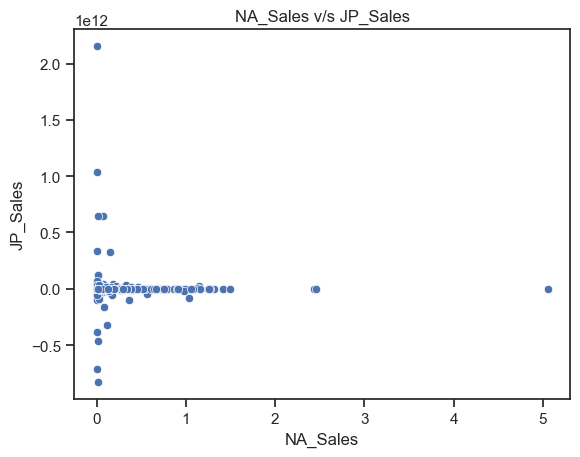

In [86]:
sns.scatterplot(x=Y_test,y=y_pred)
plt.xlabel('NA_Sales')
plt.ylabel('JP_Sales')
plt.title('NA_Sales v/s JP_Sales')

In [87]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import Ridge,Lasso

In [ ]:
lr_model=LinearRegression()
lr_scores=cross_val_score(lr_model,X_train,Y_train,cv=5)

In [76]:
lasso_model=Lasso(alpha=1.0)
lassso_scores=cross_val_score(lasso_model,X_train,Y_train,cv=5)

NameError: name 'Lasso' is not defined